In [23]:
# Load The Libraries:
import pandas as pd
import numpy as np
import random
import sklearn
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Load the Data:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

In [3]:
# The target variable here is 'isFraud' whether the transaction is fraudulent.
# Let us look at how many fraud transactions are there and how many normal transactions are there in the dataset.

In [4]:
df.isFraud.value_counts()

isFraud
0    57049
1     2005
Name: count, dtype: int64

In [5]:
# Pre-Processing and Data Wrangling:
# Set X and y variables
X = df.loc[:, df.columns != 'isFraud']
y = df['isFraud']

In [6]:
from sklearn.model_selection import train_test_split
# Split randomly into 70% train data and 30% test data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41337 entries, 12662 to 52734
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(17), object(31)
memory usage: 136.9+ MB


In [8]:
# Step 1) Check for missing Values:
X_train.isnull().sum()

TransactionID         0
TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
                  ...  
id_36             31403
id_37             31403
id_38             31403
DeviceType        31419
DeviceInfo        33011
Length: 433, dtype: int64

In [9]:
# Eliminate automatically variables with more than 20% of missing values:
X_train_before_filling = X_train
X_train = X_train[X_train.columns[X_train.isnull().mean() < 0.2]]

In [10]:
# Let see which among remaining columns have missing values in the code below:
missing_cols = X_train.columns[X_train.isnull().mean() > 0]
print(missing_cols)

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain', 'D1', 'D10',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=162)


In [11]:
X_train['card5'].isnull().mean()   # Let us use this variable for comperison later

0.007499334736434671

In [13]:
# Imputation : Filling missing values in a variable by reasonable approximations like mean of the variable to allow machine learning models to work
# Step 1a. Single Imputation Technique
# Impute Numeric Variables with mean of the variable

In [17]:
X_train_single= X_train
cols= X_train_single.columns
num_cols = X_train_single.select_dtypes(include=np.number).columns
X_train_single.loc[:,num_cols]=X_train_single.loc[:,num_cols].fillna(X_train_single.loc[:,num_cols].mean())
print(num_cols)
print(X_train_single.loc[:,num_cols].mean())

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'C1',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=177)
TransactionID     3.281805e+06
TransactionDT     7.357705e+06
TransactionAmt    1.347207e+02
card1             9.912457e+03
card2             3.626188e+02
                      ...     
V317              2.722976e+02
V318              1.823263e+02
V319              1.665254e+01
V320              4.211091e+01
V321              2.752951e+01
Length: 177, dtype: float64


In [18]:
# Impute categorical Variables with mode of the variable:
cat_cols = list(set(cols) - set(num_cols))
X_train_single.loc[:, cat_cols] = X_train_single.loc[:,cat_cols].fillna(X_train.loc[:, cat_cols].mode().iloc[0])
train_cols = X_train_single.columns
print(cat_cols)
print(X_train_single.loc[:,cat_cols].mode().iloc[0])

['ProductCD', 'P_emaildomain', 'card4', 'card6']
ProductCD                W
P_emaildomain    gmail.com
card4                 visa
card6                debit
Name: 0, dtype: object


In [20]:
# Check if missingness is now 0 for all variables remaining:
# Empty column list indicates no variable has missing values anymore:
X_train_single.columns[X_train_single.isnull().mean() > 0]   # Select those variables with missing values

Index([], dtype='object')

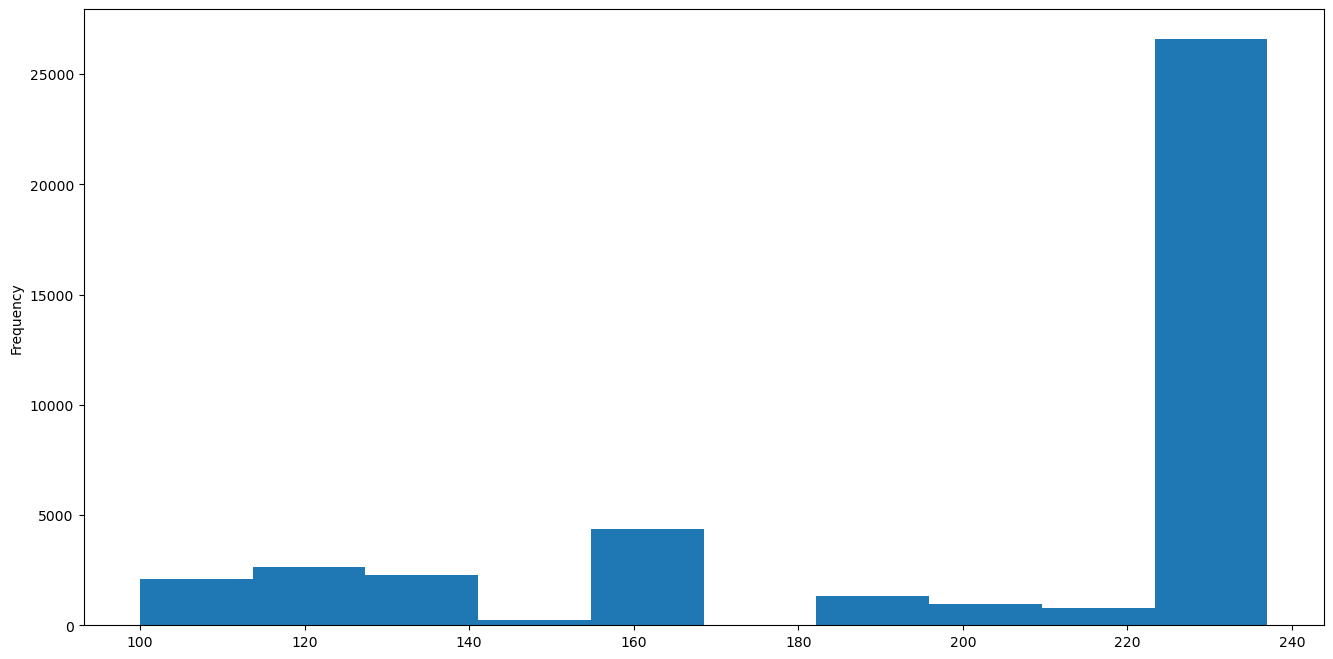

In [24]:
# Comparing variable before and after filling: (with having the 'card5' earlier)
# Card5 variable before filling missing values with its mean

X_train_single['card5'].plot.hist(figsize=(16, 8));
plt.show()

<Axes: ylabel='Frequency'>

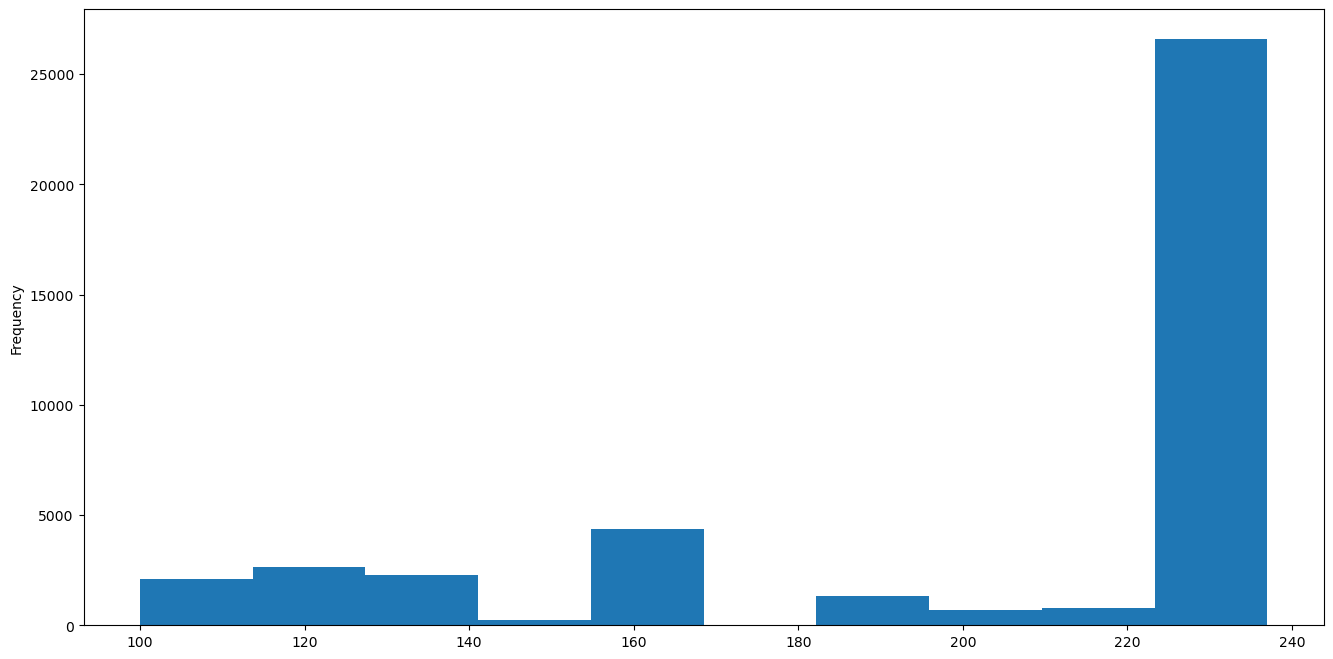

In [25]:
X_train_before_filling['card5'].plot.hist(figsize=(16,8))

In [26]:
X_train_single['card5'].describe()

count    41337.000000
mean       199.235991
std         41.036349
min        100.000000
25%        166.000000
50%        226.000000
75%        226.000000
max        237.000000
Name: card5, dtype: float64

In [27]:
X_train_before_filling['card5'].describe()

count    41027.000000
mean       199.235991
std         41.191096
min        100.000000
25%        166.000000
50%        226.000000
75%        226.000000
max        237.000000
Name: card5, dtype: float64

In [28]:
# In above describe command, we are looking how is the variable distributed in terms of mean, standard deviation etc.

In [29]:
X_train = X_train_single  # Let us single imputed data as further data for preprocessing in the next step:

In [30]:
# Step 2) One hot encoding : To make all variables numeric to feed to machine learning process further

In [31]:
X_train.info()
X_train_dummy = pd.get_dummies(X_train, prefix_sep='_', drop_first=True)

<class 'pandas.core.frame.DataFrame'>
Index: 41337 entries, 12662 to 52734
Columns: 181 entries, TransactionID to V321
dtypes: float64(160), int64(17), object(4)
memory usage: 57.4+ MB


In [32]:
X_train_dummy

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
12662,3058646,1612658,46.500,7861,494.0,150.0,226.0,299.000000,87.000000,1,...,False,False,False,False,False,False,False,False,False,False
47037,3469434,12533197,20.950,10748,455.0,150.0,195.0,337.000000,87.000000,9,...,False,False,False,False,False,False,False,False,False,False
29179,3302515,7855766,139.117,4606,141.0,185.0,137.0,290.763705,86.802851,1,...,False,False,False,False,False,False,False,False,False,False
40680,3010196,595984,280.330,4141,404.0,150.0,102.0,327.000000,87.000000,1,...,False,False,False,False,False,False,False,False,False,False
6080,3288879,7447462,186.610,13266,321.0,150.0,226.0,158.000000,87.000000,13,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54370,3500688,13452492,311.950,10057,225.0,150.0,224.0,123.000000,87.000000,3,...,False,False,False,False,False,False,False,False,False,False
17730,3038837,1212291,114.950,2492,543.0,150.0,224.0,299.000000,87.000000,3,...,False,False,False,False,False,False,False,False,False,False
28030,3055357,1544901,75.000,1690,516.0,150.0,224.0,110.000000,87.000000,1,...,False,False,False,False,False,False,False,False,False,False
15725,3144269,3273875,206.000,17188,321.0,150.0,226.0,310.000000,87.000000,6,...,False,False,False,False,False,False,False,False,False,False


In [33]:
# Finalizing the data before training a model:
final_tr = pd.DataFrame(data=X_train_dummy)

print(final_tr)
print(final_tr.shape)

       TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
12662        3058646        1612658          46.500   7861  494.0  150.0   
47037        3469434       12533197          20.950  10748  455.0  150.0   
29179        3302515        7855766         139.117   4606  141.0  185.0   
40680        3010196         595984         280.330   4141  404.0  150.0   
6080         3288879        7447462         186.610  13266  321.0  150.0   
...              ...            ...             ...    ...    ...    ...   
54370        3500688       13452492         311.950  10057  225.0  150.0   
17730        3038837        1212291         114.950   2492  543.0  150.0   
28030        3055357        1544901          75.000   1690  516.0  150.0   
15725        3144269        3273875         206.000  17188  321.0  150.0   
52734        3268764        6885116          31.298   5812  408.0  185.0   

       card5       addr1      addr2  C1  ...  P_emaildomain_web.de  \
12662  226.0  299

In [34]:
# Decision Tree using grid Search CV:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3, 20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, cv=5, scoring='roc_auc')
clf.fit(X=final_tr, y=y_train)
dt = clf.best_estimator_  # Final decision tree
print(clf.best_score_, clf.best_params_)

0.7646378884086165 {'max_depth': 8}


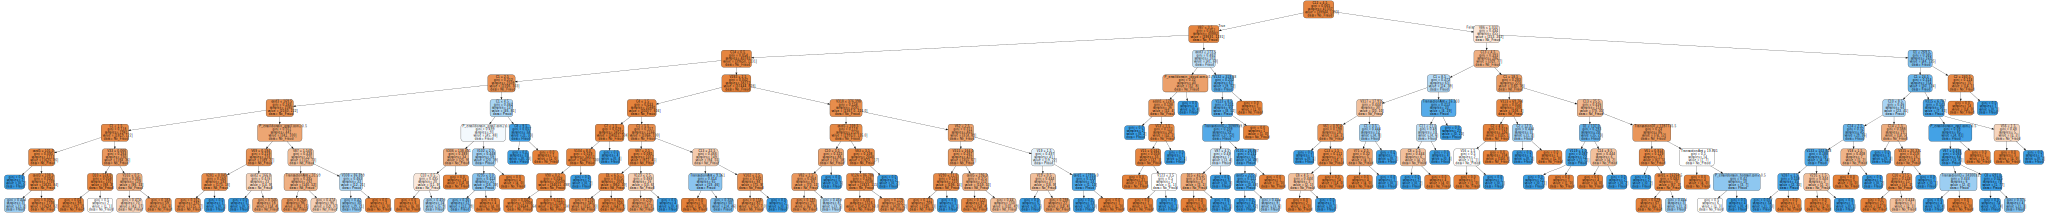

In [35]:
# Visualizing the decision tree:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None,
                               feature_names=final_tr.columns,
                               class_names=['No_Fraud', 'Fraud'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

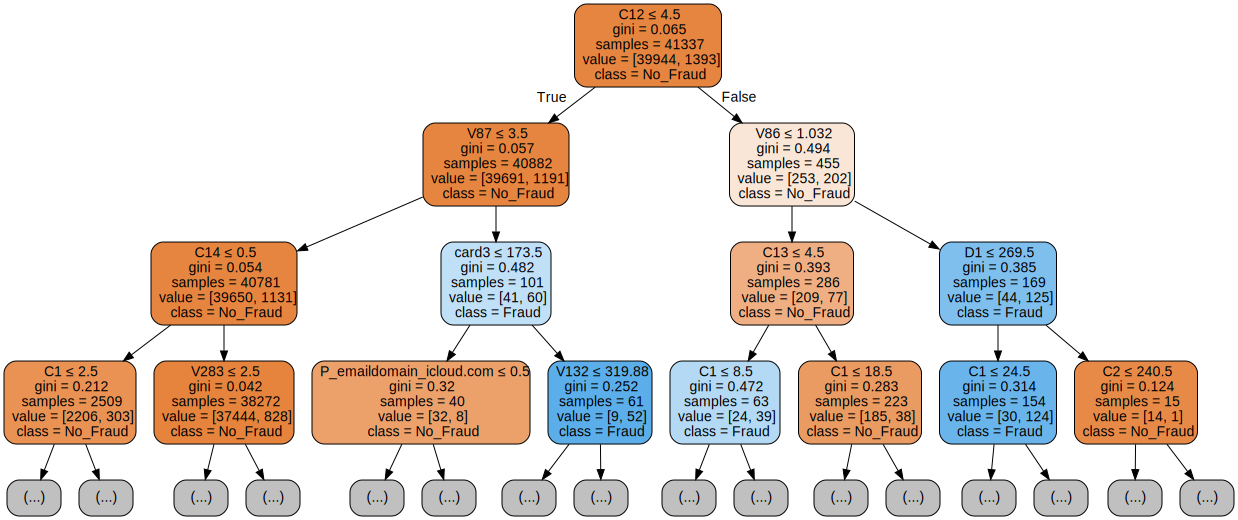

In [36]:
# With max depth 3:
dot_data = tree.export_graphviz(dt, out_file=None,
                               feature_names=final_tr.columns,
                               class_names=['No_Fraud', 'Fraud'],
                               filled=True, rounded=True,
                               special_characters=True,
                               max_depth = 3)
graph = graphviz.Source(dot_data)
graph